# Data Profiling

### Import modules

In [1]:
import pandas
import numpy
import random
import datetime
import os

### Helper function to generate data

In [2]:
def generate_dynamic_random_code(code_length):
    
    characters_string = "abcdefghijklmnopqrstuvwxyz1234567890ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    
    listchar = list(characters_string)
    
    placeholder_string = "-" * code_length
    
    placeholders = list(placeholder_string)
    
    for index in range(len(placeholders)):
    
        random_index = random.randint(0,len(listchar) - 1)
    
        character = listchar[random_index]
    
        placeholders[index] = character
    
    code = "".join(placeholders)
    
    return code

In [3]:
def generate_float_frame(row_count, column_count, assign_col_names = False, nullperc = 0.04):
    
    data = pandas.DataFrame(numpy.random.random((row_count, column_count)))
    
    if assign_col_names == True:
        
        columns = []
        while len(columns) < column_count:
            
            columns.append(generate_dynamic_random_code(8))
            
        data.columns = columns
    
    if nullperc < 0 or nullperc >100:
        nullperc = 0.2
        print("percentage of nulls defaulted to 0.2")
    
    total_cells = data.shape[0] * data.shape[1]
    
    null_cells = int(total_cells * nullperc)
    
    for iteration in range(null_cells):
        
        r_index = random.randint(0,row_count - 1)
        c_index = random.randint(0, column_count - 1)
        data.iloc[r_index, c_index] = None
    
    return data

### Import/Create Data

### Usage Example for `generate_float_frame`
```python
data = generate_float_frame(row_count = 400,
                            column_count = 6,
                            assign_col_names = True)
```

In [4]:
#Read in data from excel or csv using read_excel or read_csv method

datapath = "/users/danielcorcoran/desktop/github_repos/\
python_nb_data_profiling/test_data/Sample - Superstore.xls"

data = pandas.read_excel(datapath, sheet_name = "Orders")

print("Dataframe dimensions are {}".format(data.shape))

Dataframe dimensions are (9994, 21)


## Extract Profile

### Get Statistical Summary

In [5]:
describe = data.describe(include = "all")
describe_transposed = describe.T
describe_final = describe_transposed.reset_index()

In [6]:
describe_final

,index,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
0,Row ID,9994,NaN,NaN,NaN,NaN,NaN,4997.5,2885.16,1,2499.25,4997.5,7495.75,9994
1,Order ID,9994,5009,CA-2017-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Order Date,9994,1237,2016-09-05 00:00:00,38,2014-01-03 00:00:00,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ship Date,9994,1334,2015-12-16 00:00:00,35,2014-01-07 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ship Mode,9994,4,Standard Class,5968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Customer ID,9994,793,WB-21850,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Customer Name,9994,793,William Brown,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Segment,9994,3,Consumer,5191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Country,9994,1,United States,9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,City,9994,531,New York City,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Get Data Types

In [7]:
dtypes = data.dtypes

In [8]:
dtypes_dataframe = pandas.DataFrame(dtypes, columns = ["data_type"])

In [9]:
dtypes_final = dtypes_dataframe.reset_index()

In [10]:
dtypes_final

,index,data_type
0,Row ID,int64
1,Order ID,object
2,Order Date,datetime64[ns]
3,Ship Date,datetime64[ns]
4,Ship Mode,object
5,Customer ID,object
6,Customer Name,object
7,Segment,object
8,Country,object
9,City,object


### Get Null composition

In [11]:
filled_count_series = data.notnull().sum().astype(int)
null_count_series = data.isnull().sum().astype(int)
totalcount = data.shape[0]

In [12]:
percent_null =  null_count_series / totalcount
percent_filled = filled_count_series / totalcount

In [13]:
percent_null = percent_null.reset_index().rename(columns = {0:"null_percent"})
percent_filled = percent_filled.reset_index().rename(columns = {0:"non_null_percent"})
filled_count_series = filled_count_series.reset_index().rename(columns = {0:"non_null_counts"})
null_count_series = null_count_series.reset_index().rename(columns = {0:"null_counts"})

In [14]:
from functools import reduce

In [15]:
null_info_dataframe = reduce(lambda left,right: pandas.merge(left,right,on='index'), [percent_null,
                                                                                 percent_filled,
                                                                                 filled_count_series,
                                                                                 null_count_series])

In [16]:
null_info_dataframe

,index,null_percent,non_null_percent,non_null_counts,null_counts
0,Row ID,0.0,1.0,9994,0
1,Order ID,0.0,1.0,9994,0
2,Order Date,0.0,1.0,9994,0
3,Ship Date,0.0,1.0,9994,0
4,Ship Mode,0.0,1.0,9994,0
5,Customer ID,0.0,1.0,9994,0
6,Customer Name,0.0,1.0,9994,0
7,Segment,0.0,1.0,9994,0
8,Country,0.0,1.0,9994,0
9,City,0.0,1.0,9994,0



### Merge all

In [17]:
merged = reduce(lambda left,right: pandas.merge(left,right,on='index', how = "left"), [null_info_dataframe,
                                                                        dtypes_final,
                                                                        describe_final])

### Cleanup

#### Drop count column

In [18]:
merged["row_count"] = merged["non_null_counts"] + merged["null_counts"]

merged.drop(["count"], axis = 1, inplace = True)

#### Change types

In [19]:
merged["data_type"] = merged["data_type"].astype(str)

#### Round values

In [20]:
rounded_places = 4

for column in ["mean", "std", "min", "25%", "50%", "75%", "max"]:
    
    merged[column] = merged[column].astype(float).round(rounded_places)

### Create dictionary and print

In [21]:
profile_dict = {}

In [22]:
#get list of colunmns other than 'index' column
merged_attributes = list(merged.columns)[1:]

for index in range(merged.shape[0]):
    
    column = merged.loc[index, "index"]
    column_padded = "  " + column + "  "
    
    print("\n\n", column_padded.center(44, "-"),"\n",sep = "")  
    
    profile_dict[column] = []    
    
    for attr in merged_attributes:
        
        attr_ = attr + ":"
        value = merged.loc[index, attr]
        value_string = str(value)
        
        if "percent" in attr:
            print(attr_.ljust(22, " "), "{0:.2%}".format(value).rjust(22, " "), sep = "")    
        else:
            print(attr_.ljust(22, " "), value_string.rjust(22, " "), sep = "")    
        
        profile_dict[column].append({attr:value})



-----------------  Row ID  -----------------

null_percent:                          0.00%
non_null_percent:                    100.00%
non_null_counts:                        9994
null_counts:                               0
data_type:                             int64
unique:                                  nan
top:                                     nan
freq:                                    nan
first:                                   nan
last:                                    nan
mean:                                 4997.5
std:                               2885.1636
min:                                     1.0
25%:                                 2499.25
50%:                                  4997.5
75%:                                 7495.75
max:                                  9994.0
row_count:                              9994


----------------  Order ID  ----------------

null_percent:                          0.00%
non_null_percent:                    100.00%
non_

### Export results as .json and .csv

#### Set export pathway

In [23]:
exportpath = "/users/danielcorcoran/desktop/github_repos/python_nb_data_profiling/exports/"

#### Export as json

##### Helper Function to convert invalid json values

In [24]:
def convert_invalid_values(value):
    
    try:
        new_value = float(value)
    except:
        new_value = str(value)

    return new_value

In [25]:
with open(exportpath + "profile.json", "w") as fileobj:
    json.dump(profile_dict, fileobj, default = convert_invalid_values)
    
fileobj.close()

#### Export as csv

In [26]:
merged.to_csv(exportpath + "profile.csv", index = False)

## Visualize
(Optional)

In [27]:
import seaborn
import matplotlib.pyplot as plt

In [28]:
seaborn.set_style("whitegrid")

In [29]:
seaborn.set(rc = { "figure.figsize" : (12,8) }, font_scale = 1.5)

In [30]:
data_no_nulls = data.dropna(how = "any", 
                            axis = 0)

In [31]:
data_no_nulls.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

##### Default parameters
```python
seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)
```

In [32]:
nunique_range = [2,7]

In [33]:
subset_merged = list(merged[(merged["unique"] >= nunique_range[0]) & 
                       (merged["unique"] <= nunique_range[1]) & 
                       (merged["data_type"] == "object")]["index"])

In [34]:
subset_merged

['Ship Mode', 'Segment', 'Region', 'Category']

<Figure size 864x576 with 0 Axes>

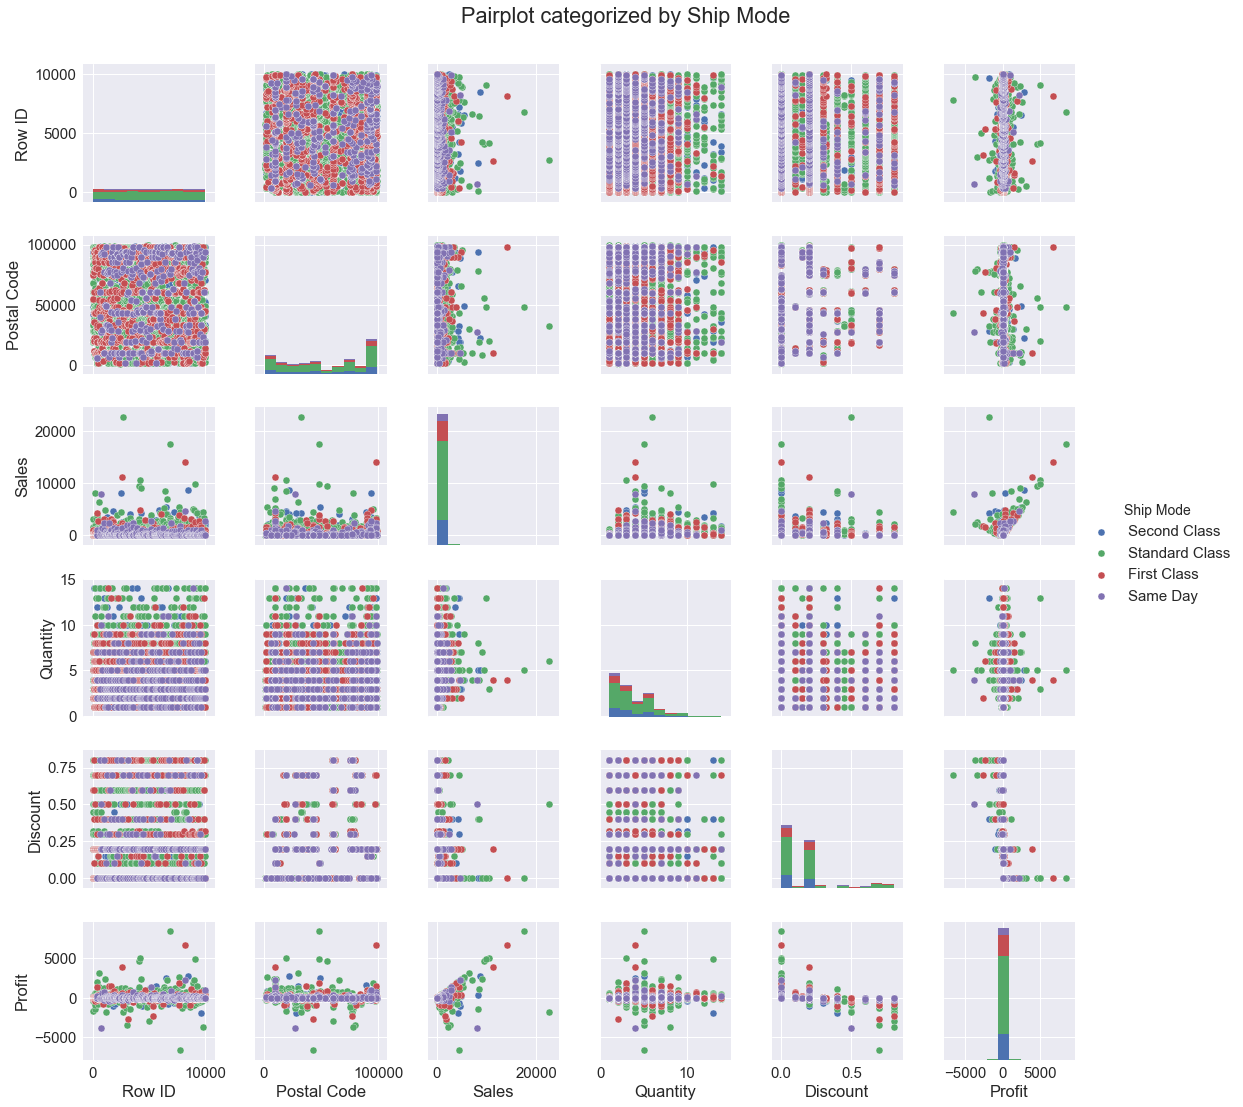

<Figure size 864x576 with 0 Axes>

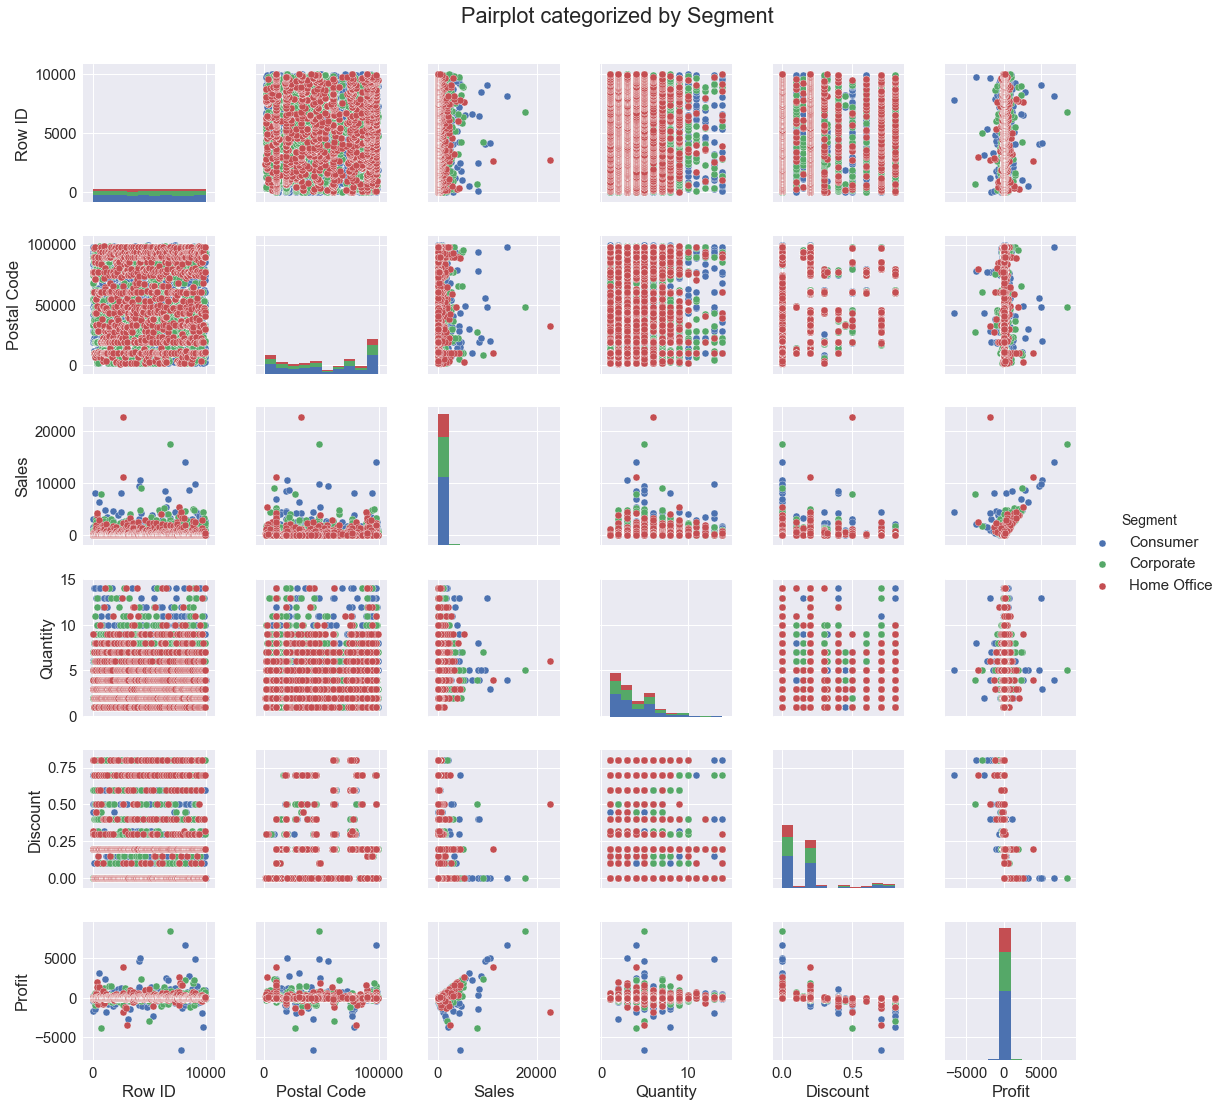

<Figure size 864x576 with 0 Axes>

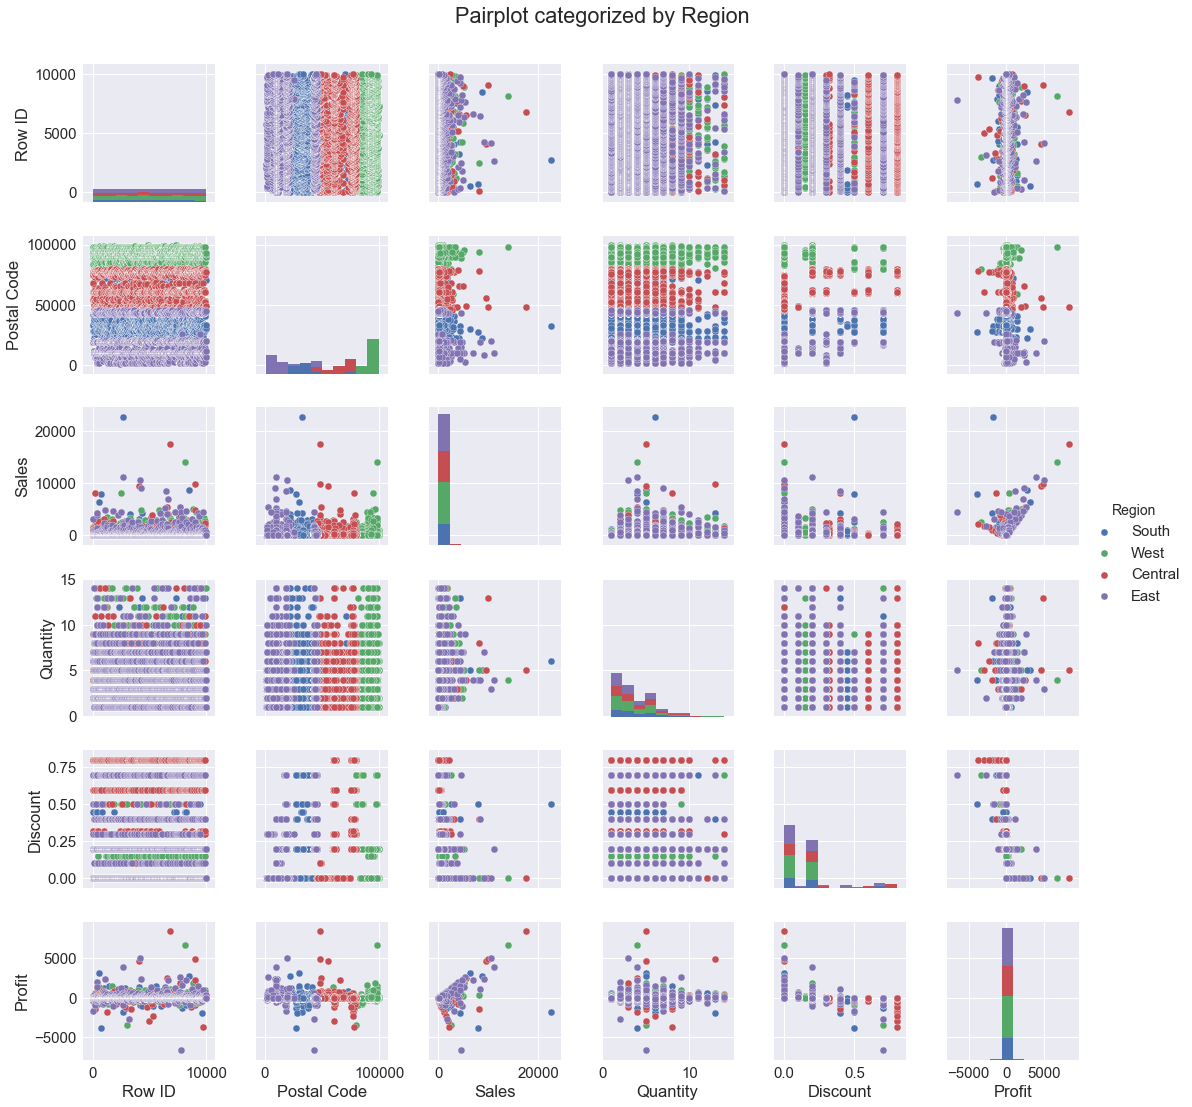

<Figure size 864x576 with 0 Axes>

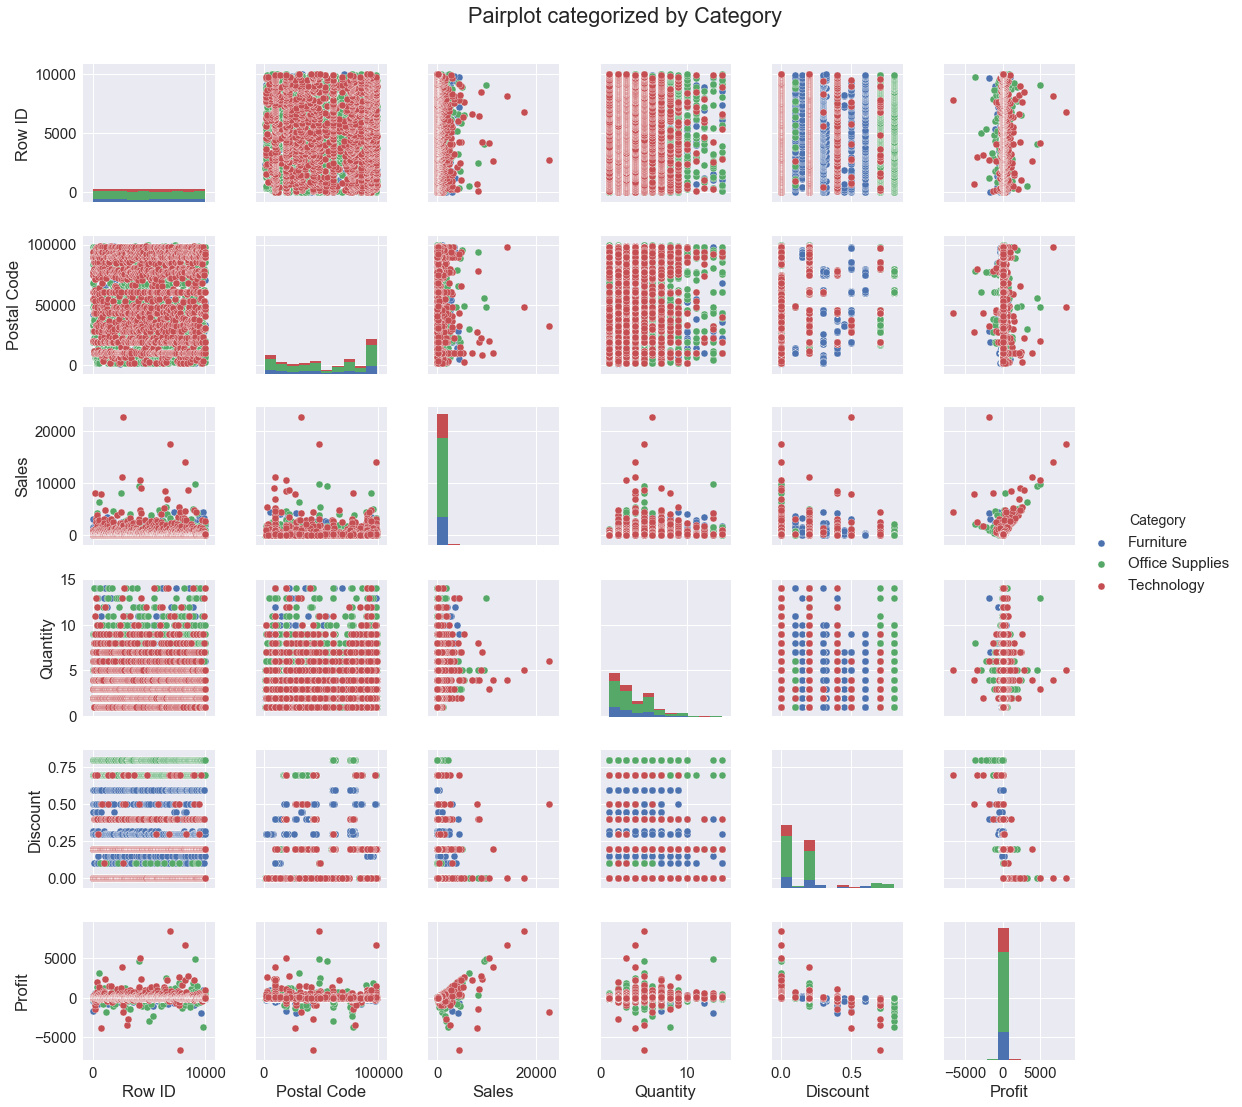

In [35]:
for column in subset_merged:
    
    plt.figure()
    
    myplot = seaborn.pairplot(data = data_no_nulls, 
                              kind = "scatter",
                              hue = column
                             )
    
    myplot.fig.suptitle("Pairplot categorized by {}".format(column), 
                 y = 1.03)

    plt.savefig(exportpath + column + "_pairplot.png")